# Numerical Computing :: Project Ten
### Julia Troni
Consider the function
$f(x) = sin(4.8 π x)$
 - Compute the derivative by hand to get the truth. Implement the followingnumerical methods for approximating first derivatives: Use the numerical methods to estimate the derivative at some value of x.
     - (i) one-sided forward difference, 
     - (ii) one-sided backward difference, and 
     - (iii) central difference. 

- Study the convergence of the finite difference approximations. 
    - Choose several values of h and compute the error for each, then plot the relationship. 
    - Identify the asymptotic regime to estimate the convergence rate of each method. Do the rates depend on x?


In [1]:
%matplotlib notebook
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import math

### Derivative By Hand "Truth": 

$$ \frac{\mathrm{d}}{\mathrm{d}x}sin(4.8\pi x) = 4.8 \pi cos(4.8 \pi x) $$

In [2]:
#Define original function
function= lambda x: np.sin(4.8*np.pi*x)

In [3]:
#Define derivative "truth"
truth= lambda x: 4.8*np.pi*np.cos(4.8*np.pi*x)

## Numerical Methods: forward difference, backward difference, and central difference.

In [8]:
def func(x):
    return np.sin(4.8*np.pi*x)
def deriv(x):
    return 4.8*np.pi*np.cos(4.8*np.pi*x)
     
def forward (f, t, h):
    return ((f(t+h) - f(t)) / h)
def backward (f, t, h):
    return ((f(t)-f(t-h)) / h)
def central (f, t, h):
    return ((f(t+h) - f(t-h)) / (2.0*h))


print("Forward difference", forward(func,-.55,.000001))
print ("Backward difference",backward(func,-.55,.000001))
print("Central difference",central(func,-.55,.000001))
print("By hand derivative 'truth'", truth(-.55))

Forward difference -6.420497576486994
Backward difference -6.420703329568234
Central difference -6.420600453027614
By hand derivative 'truth' -6.420600453271205


<IPython.core.display.Javascript object>


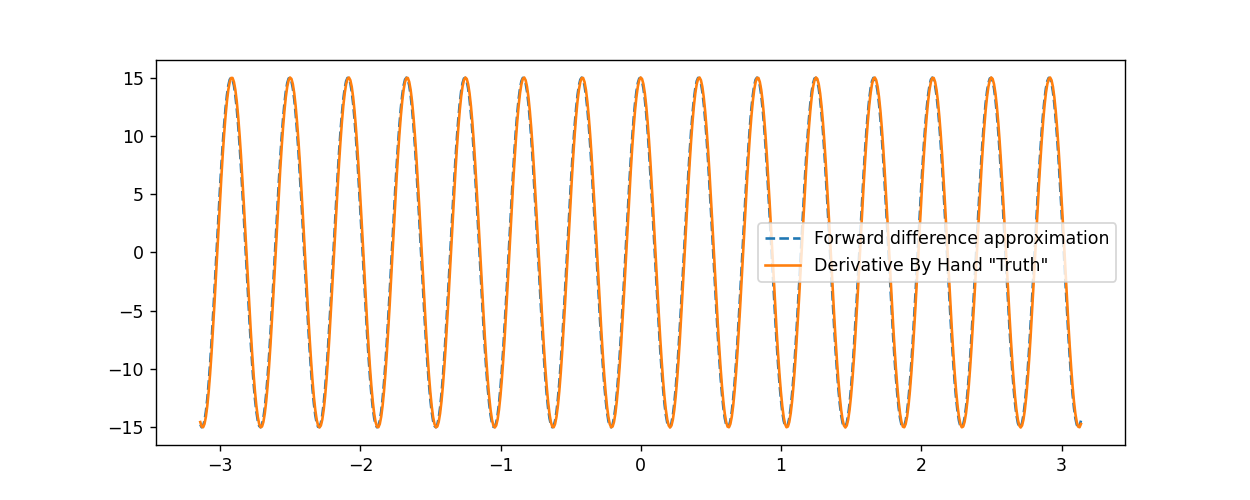

1.1361858894779657


In [5]:
# step size
h = 0.01
# define grid
x = np.arange(-np.pi, np.pi, h) 
# compute function
#y = np.cos(x) 

# compute vector of forward differences
#forward_diff = np.diff(function(x))/h 
forward_diff = forward(function, x, h) 
# compute corresponding grid
#x_diff = x[:-1:] 
# compute exact solution
exact_solution = truth(x) 

# Plot solution
plt.figure(figsize = (10, 4))
plt.plot(x, forward_diff, '--', \
         label = 'Forward difference approximation')
plt.plot(x, exact_solution, \
         label = 'Derivative By Hand "Truth"')
plt.legend()
plt.show()

# Compute max error between 
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

<IPython.core.display.Javascript object>


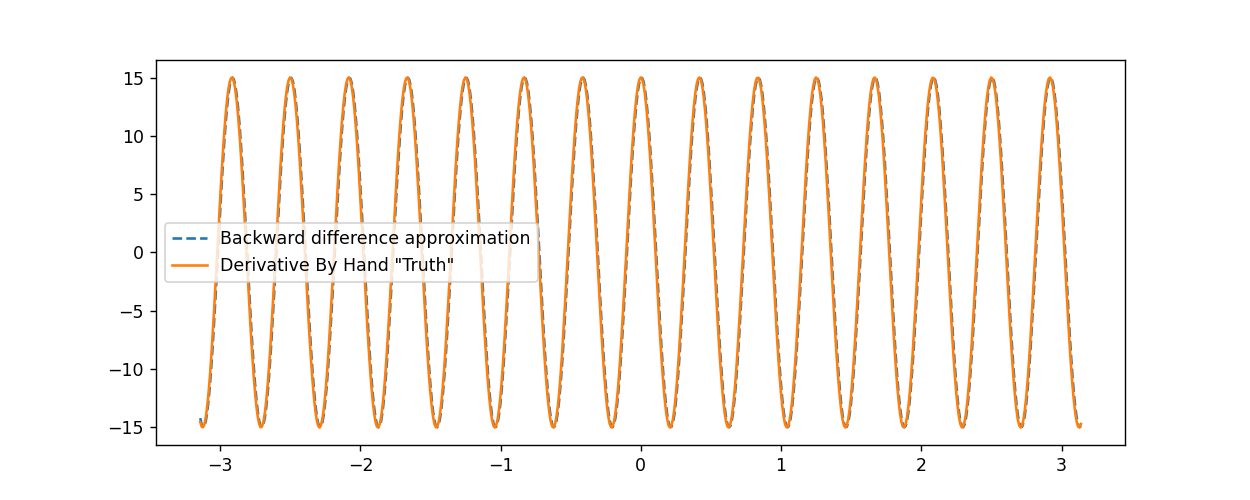

1.1361858894779657


In [6]:
# step size
h = 0.01
# define grid
x = np.arange(-np.pi, np.pi, h) 
# compute function
#y = np.cos(x) 

# compute vector of forward differences
#forward_diff = np.diff(function(x))/h 
backward_diff = backward(function, x, h) 
# compute corresponding grid
#x_diff = x[:-1:] 
# compute exact solution
exact_solution = truth(x) 

# Plot solution
plt.figure(figsize = (10, 4))
plt.plot(x, backward_diff, '--', \
         label = 'Backward difference approximation')
plt.plot(x, exact_solution, \
         label = 'Derivative By Hand "Truth"')
plt.legend()
plt.show()

# Compute max error between 
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

<IPython.core.display.Javascript object>


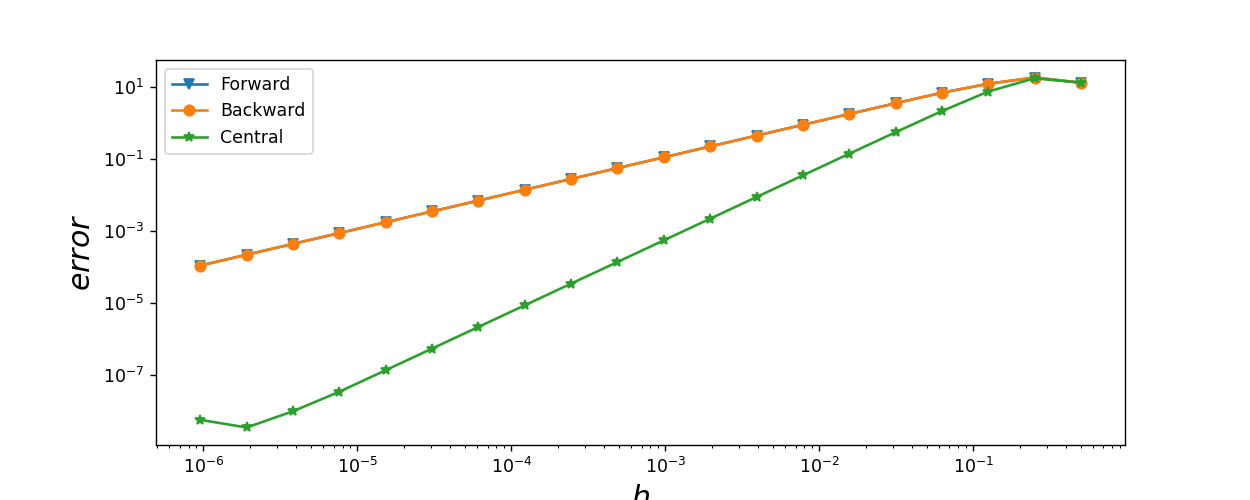

In [7]:
# define step size
h = 1
# define number of iterations to perform
iterations = 20
# list to store our step sizes
step_size = [] 
# list to store max error for each step size
max_error_f = [] 
max_error_b = [] 
max_error_c = [] 

for i in range(iterations):
    # halve the step size
    h /= 2 
    # store this step size
    step_size.append(h) 
    # compute new grid
    x = np.arange(0, 2* np.pi, h) 
    # compute function value at grid
    y = np.cos(x) 
    # compute vector of forward differences
    #forward_diff = np.diff(func(x))/h 
    forward_diff = forward(function, x, h) 
    
    backward_diff= backward(function, x, h)
    central_diff = central(function, x, h)
    
    # compute corresponding grid
    #x_diff = x[:-1] 
    # compute exact solution
    #exact_solution = deriv(x_diff) 
    exact_solution = truth(x) 
    
    # Compute max error between 
    # numerical derivative and exact solution
    max_error_f.append(\
            max(abs(exact_solution - forward_diff)))
    max_error_b.append(\
            max(abs(exact_solution - backward_diff)))

    max_error_c.append(\
            max(abs(exact_solution - central_diff)))


# produce log-log plot of max error versus step size
plt.figure(figsize = (10, 4))
plt.loglog(step_size, max_error_f, '-v', label="Forward")

plt.loglog(step_size, max_error_b, '-o', label="Backward")

plt.loglog(step_size, max_error_c, '-*', label= "Central")

plt.xlabel("$h$", fontsize='xx-large')
plt.ylabel("$error$", fontsize='xx-large')

plt.legend()
plt.show()

Forward and backward difference are $O(h)$ where, O(h) describes the accuracy of the forward and backward difference  for approximating derivatives. On the other hand, central difference is $O(h^2)$.

Typically, higher order accuracy is better than lower order. That is the larger the exponent on the h, the more accurate the approximation is. 

Thus we see central difference, which is  $O(h^2)$  is more accurate as it goes to 0 faster than h. Therefore the central difference formula gets an extra order of accuracy for free and thus is more accurate than forward or backward. This makes sense because formulas that use symmetric points around the x, typically are more accurate than asymmetric ones, like forward and backward difference.  

## References

- http://mikeskiba.com/numerical-methods-in-python/
- "Don't drink and derive folkz" 
- https://pythonnumericalmethods.berkeley.edu/notebooks/chapter20.02-Finite-Difference-Approximating-Derivatives.html